In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

In [33]:
data = pd.read_csv("Algerian_forest_fires_dataset.csv")
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


## Feature Engineering

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [35]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,127,9
top,1,7,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [36]:
data.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [37]:
data = data.dropna(how = 'any').reset_index(drop=True) ## drop = True because it makes another columns named index
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [38]:
data.iloc[[122], :] ## we have to remove this row also

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [39]:
data = data.drop(122).reset_index(drop=True)
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
239,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [40]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [41]:
## To remove spaces from column names like in classes
data.columns = data.columns.str.strip()
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [42]:
cat_cols = ['day', 'month', 'year', 'Temperature', 'RH', 'Ws']
cat_cols2 = ['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']

data[cat_cols] = data[cat_cols].astype(int)
data[cat_cols2] = data[cat_cols2].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(7), int32(6), object(1)
memory usage: 21.0+ KB


In [43]:
print(data["Classes"].value_counts())

for i in range(len(data)):
    if "not" in data.loc[i, "Classes"]:
        data.loc[i, "Classes"] = "not fire"
    else:
        data.loc[i, "Classes"] = "fire"

data["Classes"].value_counts()



Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64


Classes
fire        137
not fire    106
Name: count, dtype: int64

In [44]:
encoder = LabelEncoder()
encoded = encoder.fit_transform(data["Classes"])
encoded


array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1])

In [45]:
data["Classes"] = encoded
print(data["Classes"].value_counts())
data

Classes
0    137
1    106
Name: count, dtype: int64


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


Replaced fire by 0 and not fire by 1

## EDA

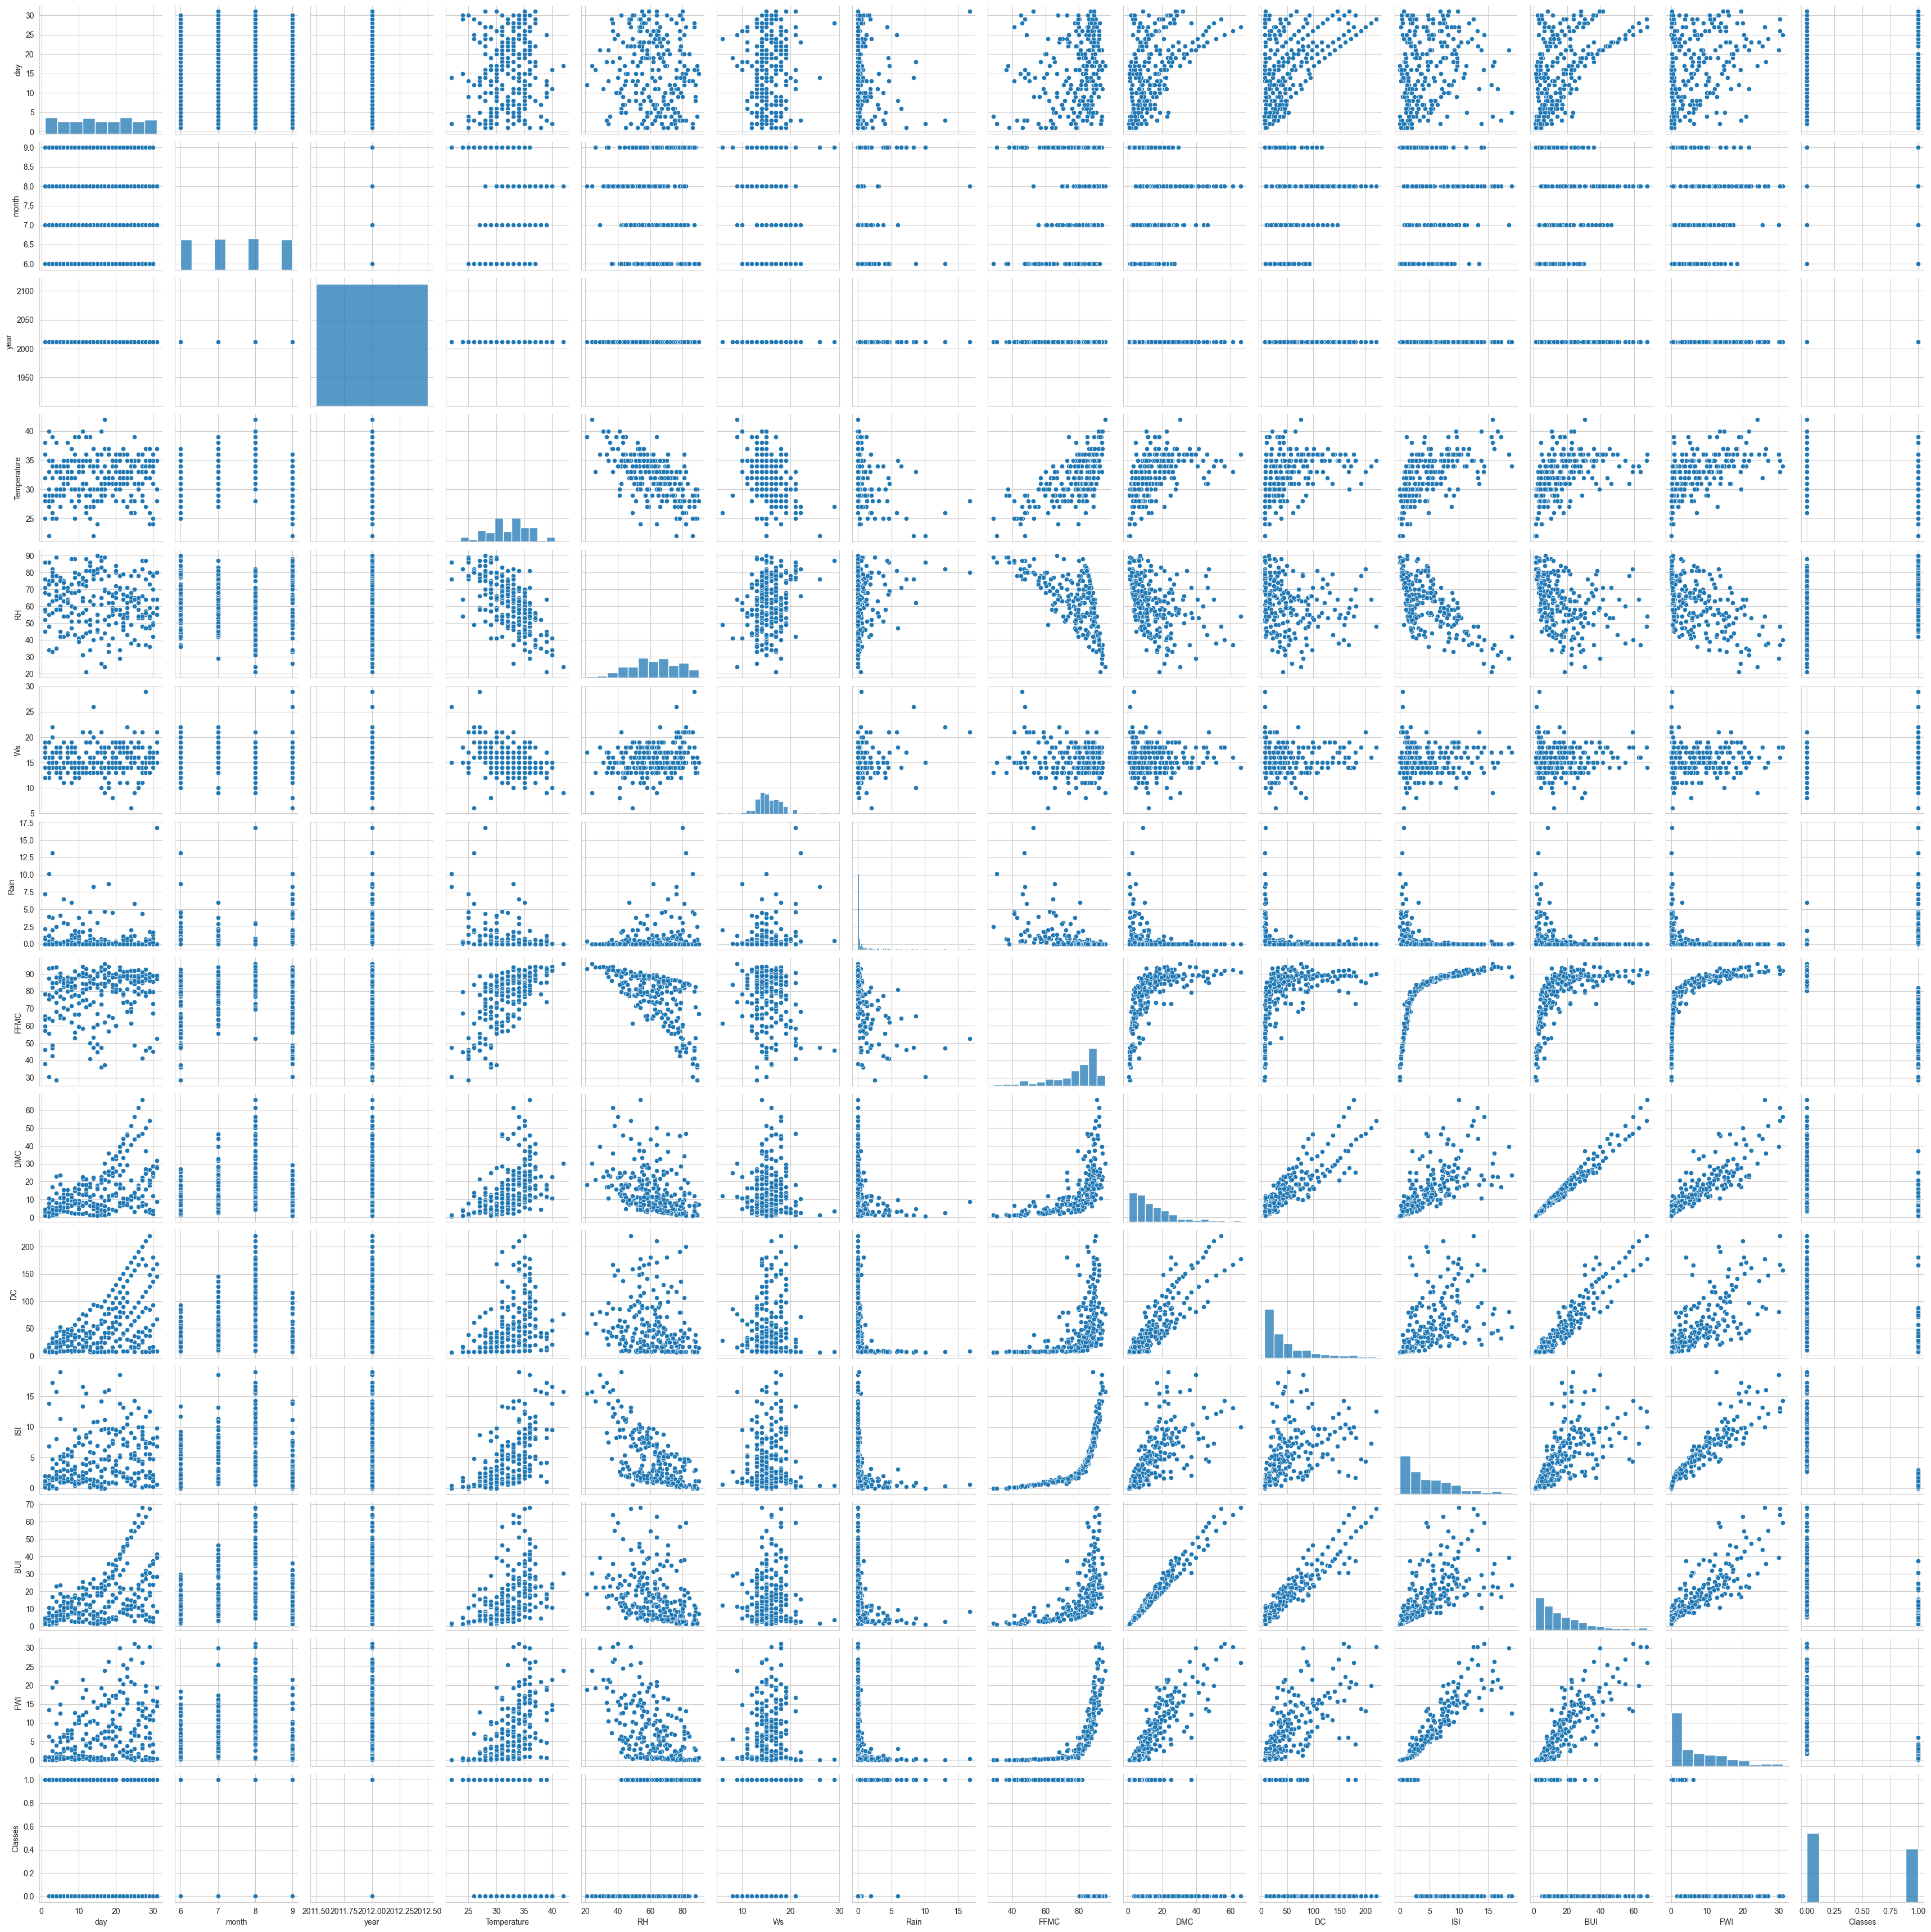

In [46]:
sns.pairplot(data)

<Axes: >

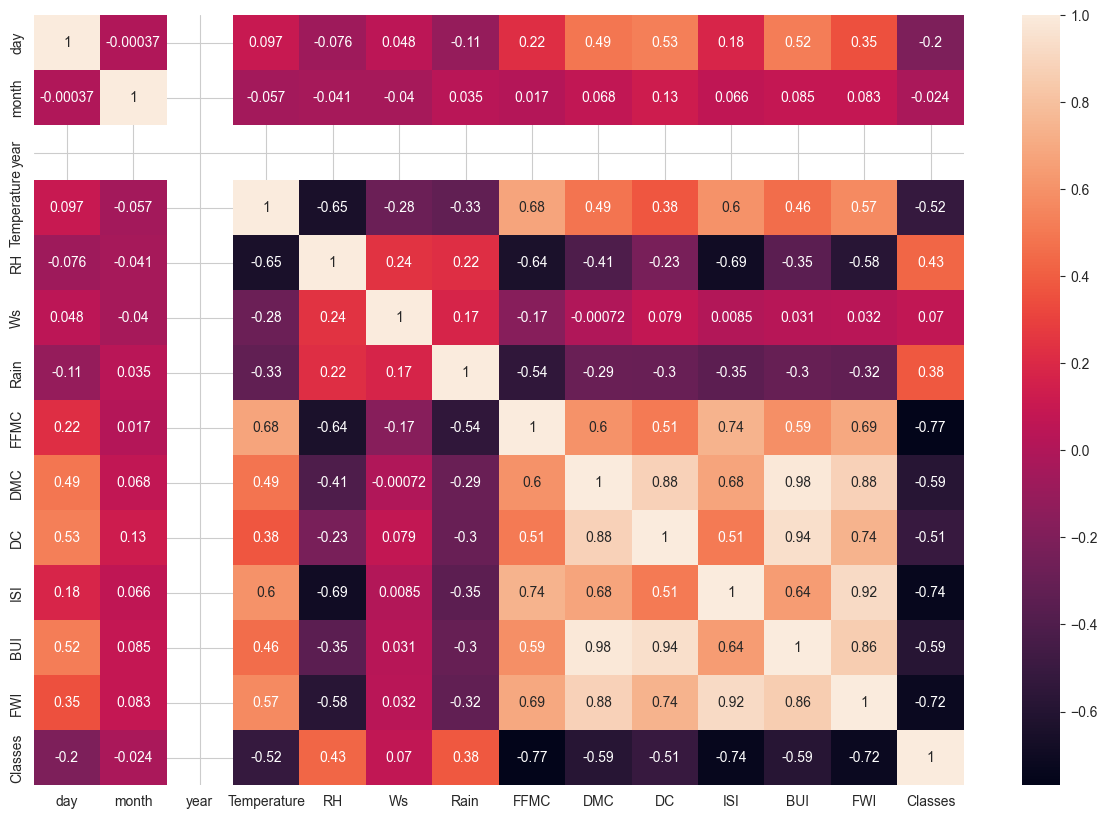

In [47]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot = True)

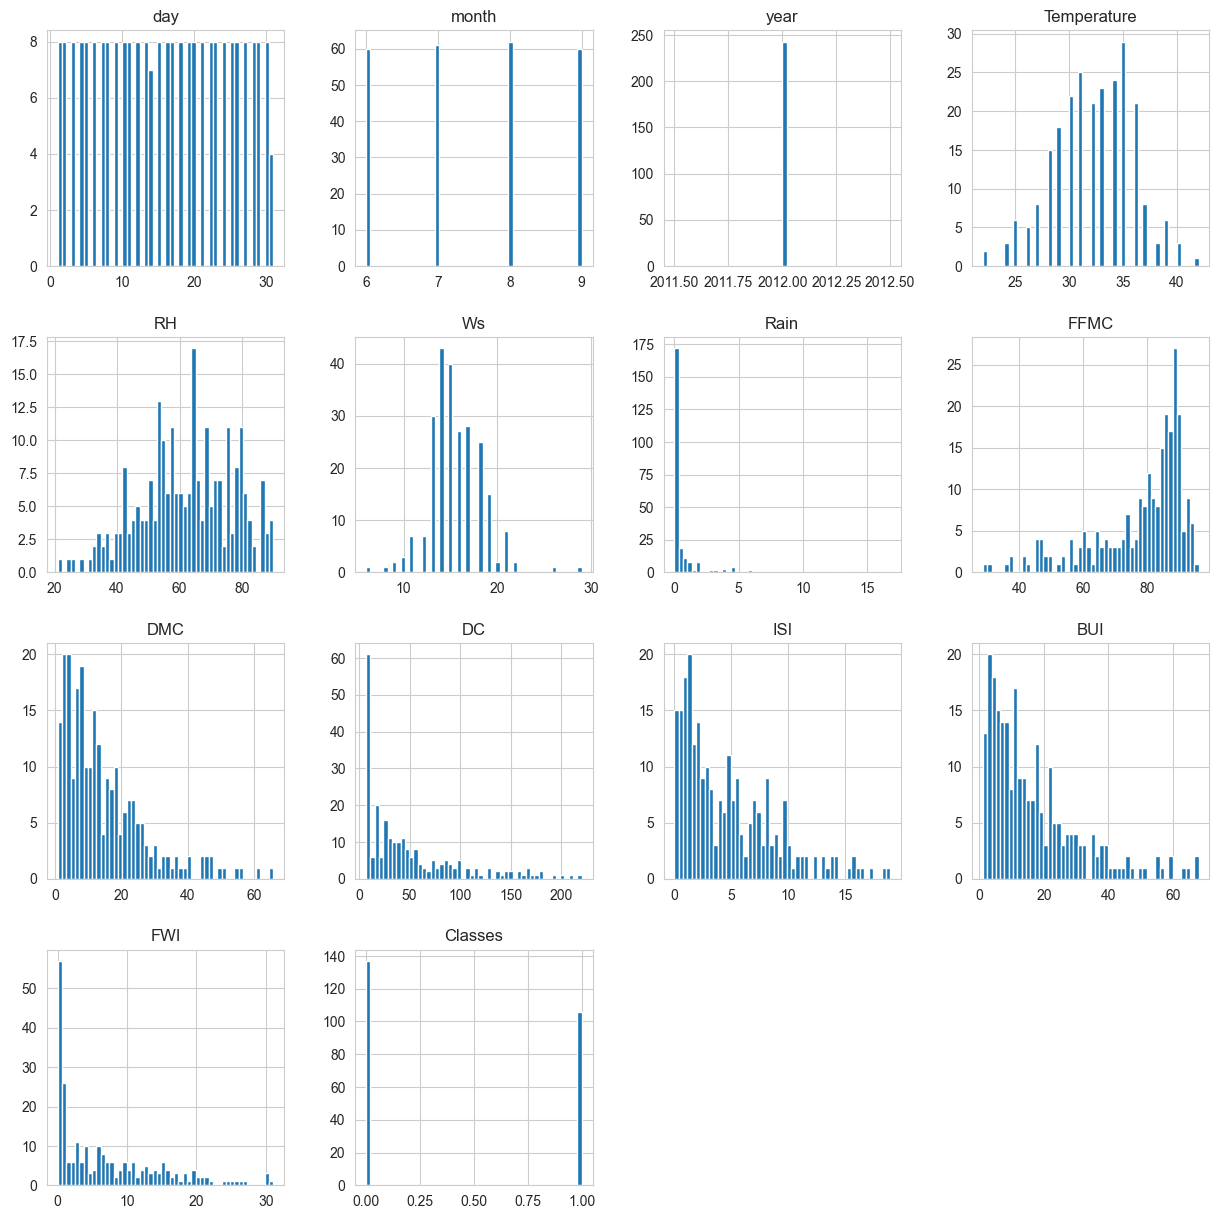

In [48]:
data.hist(bins = 50, figsize=(15,15), grid='whitegrid')
plt.show()

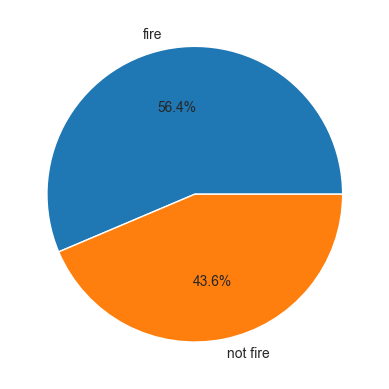

In [49]:
percentage = data['Classes'].value_counts(normalize=True)*100
plt.pie(percentage, labels = ["fire", "not fire"], autopct="%1.1f%%")
plt.show()

<Axes: xlabel='month', ylabel='count'>

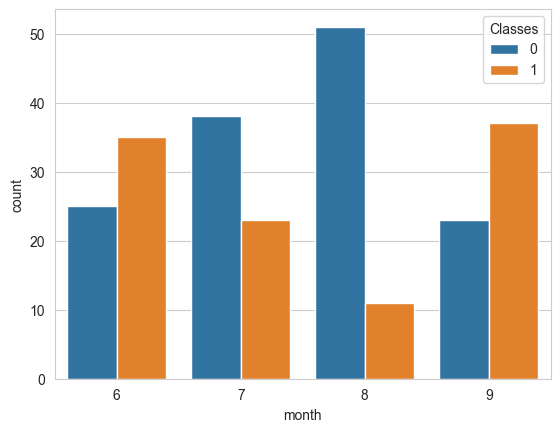

In [50]:
sns.set_style('whitegrid')
sns.countplot(x="month", hue = "Classes", data = data)

## Feature Selection

In [51]:
data.drop(columns=['year', 'month', 'day'], inplace = True)
data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


In [52]:
x = data.drop(columns=['FWI', 'Classes'], axis = 1)
y =data['FWI']
x, y

(     Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI
 0             29  57  18   0.0  65.7   3.4   7.6  1.3   3.4
 1             29  61  13   1.3  64.4   4.1   7.6  1.0   3.9
 2             26  82  22  13.1  47.1   2.5   7.1  0.3   2.7
 3             25  89  13   2.5  28.6   1.3   6.9  0.0   1.7
 4             27  77  16   0.0  64.8   3.0  14.2  1.2   3.9
 ..           ...  ..  ..   ...   ...   ...   ...  ...   ...
 238           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9
 239           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2
 240           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4
 241           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1
 242           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8
 
 [243 rows x 9 columns],
 0      0.5
 1      0.4
 2      0.1
 3      0.0
 4      0.5
       ... 
 238    6.5
 239    0.0
 240    0.2
 241    0.7
 242    0.5
 Name: FWI, Length: 243, dtype: float64)

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
x_train.shape, x_test.shape

((194, 9), (49, 9))

In [55]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


<Axes: >

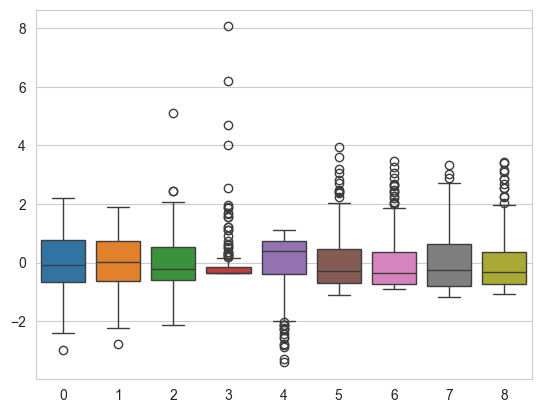

In [56]:
sns.boxplot(data=x_train)

### Simple Linear Regression

In [59]:
reg = LinearRegression()
reg.fit(x_train, y_train)
pred = reg.predict(x_test)
score = r2_score(pred, y_test)
mse = mean_squared_error(pred, y_test)
mse, score

(4.849739763896761, 0.9072159579061663)

In [60]:
reg = Lasso()
reg.fit(x_train, y_train)
pred = reg.predict(x_test)
score = r2_score(pred, y_test)
mse = mean_squared_error(pred, y_test)
mse, score

(4.306781666795592, 0.884501402245434)

In [61]:
reg = Ridge()
reg.fit(x_train, y_train)
pred = reg.predict(x_test)
score = r2_score(pred, y_test)
mse = mean_squared_error(pred, y_test)
mse, score

(4.8580744763862365, 0.9065961253352384)

In [62]:
reg = ElasticNet()
reg.fit(x_train, y_train)
pred = reg.predict(x_test)
score = r2_score(pred, y_test)
mse = mean_squared_error(pred, y_test)
mse, score

(5.47370147104097, 0.8159850617006812)

In [63]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

## Training from these regressors also tunes the hyperparameters and perform crossvalidation which makes the model more better